# 3. Noise Filtering

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

1. Noise, Cross-correlation, Convolution

In [35]:
def create_salt_pepper(img, intensity=0.05):
    noisy_img = np.copy(img)
    row, col = noisy_img.shape
    salt_pepper = np.random.rand(row, col)
    noisy_img[salt_pepper < intensity/2] = 0
    noisy_img[salt_pepper > 1 - intensity/2] = 255
    return noisy_img

def create_impulse_noise(img, intensity=0.05):
    noisy_img = np.copy(img)
    row, col = noisy_img.shape
    impulse = np.random.rand(row, col)
    noisy_img[impulse < intensity/2] = 0
    noisy_img[impulse > 1 - intensity/2] = 255
    return noisy_img

def create_gaussian_noise(img, intensity=0.05):
    noisy_img = np.copy(img)
    row, col = noisy_img.shape
    mean = 0
    std_dev = 255 * intensity / 2
    noise = np.random.normal(mean, std_dev, (row, col))
    noisy_img = np.clip(noisy_img + noise, 0, 255)
    return noisy_img

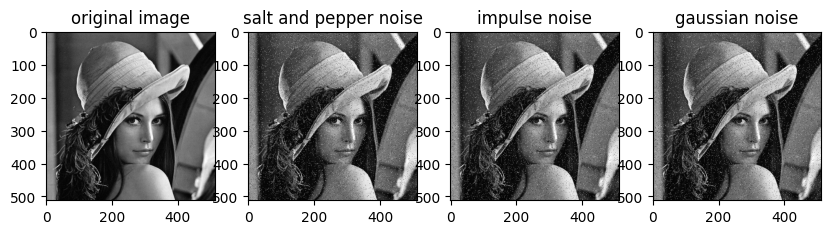

In [33]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

img_salt_pepper = create_salt_pepper(img)
img_impulse = create_impulse_noise(img)
img_gaussian = create_gaussian_noise(img)

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 4, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('salt and pepper noise')
plt.imshow(img_salt_pepper, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('impulse noise')
plt.imshow(img_impulse, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('gaussian noise')
plt.imshow(img_impulse, cmap='gray')

plt.show()

In [37]:
def cross_correlation(image, mask):
    image_h, image_w = image.shape
    mask_h, mask_w = mask.shape
    mask_h = (mask_h - 1) // 2
    mask_w = (mask_w - 1) // 2
    result = np.zeros_like(image, dtype=float)

    for j in range(mask_h, image_h - mask_h):
        for i in range(mask_w, image_w - mask_w):
            for v in range(-mask_h, mask_h + 1):
                for u in range(-mask_w, mask_w + 1):
                    result[j][i] += mask[v][u] * image[j + v][i + u]
    
    return result

def convolution(image, mask):
    image_h, image_w = image.shape
    mask_h, mask_w = mask.shape
    mask_h = (mask_h - 1) // 2
    mask_w = (mask_w - 1) // 2
    result = np.zeros_like(image, dtype=float)

    for j in range(mask_h, image_h - mask_h):
        for i in range(mask_w, image_w - mask_w):
            for v in range(-mask_h, mask_h + 1):
                for u in range(-mask_w, mask_w + 1):
                    result[j][i] += mask[v][u] * image[j - v][i - u]
    
    return result

2. Kernel

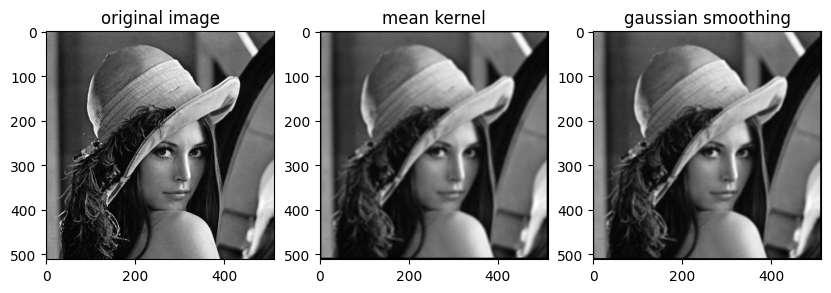

In [38]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

def mean_filter(img, size=7):
    mean_kernel = np.full((size, size), 1 / size**2)
    return convolution(img, mean_kernel)

def gaussian_filter(img):
    gaussian_kernel = (1 / 74) * np.array([[1, 2, 3, 2, 1],
                                       [2, 4, 5, 4, 2],
                                       [3, 5, 6, 5, 3],
                                       [2, 4, 5, 4, 2],
                                       [1, 2, 3, 2, 1]])
    return convolution(img, gaussian_kernel)

img_mean = mean_filter(img)
img_gaussian = gaussian_filter(img)

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('mean kernel')
plt.imshow(img_mean, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('gaussian smoothing')
plt.imshow(img_gaussian, cmap='gray')

plt.show()

3. Median filtering

In [46]:
def median_filter(img, mask_size=7):
    if mask_size % 2 != 1:
        raise Exception('mask_size should be odd')
    
    filtered = np.zeros_like(img)
    k = mask_size // 2

    for v in range(k, img.shape[1] - k):
        for u in range(k, img.shape[0] - k):
            filtered[v][u] = np.median(img[v-k:v+k, u-k:u+k])

    return filtered

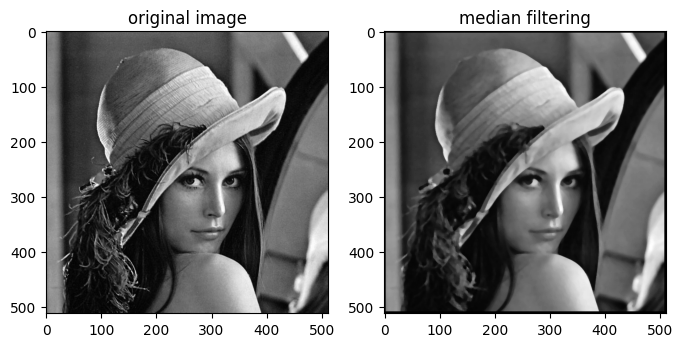

In [47]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

img_median = median_filter(img, 7)

# Plot
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('original image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('median filtering')
plt.imshow(img_median, cmap='gray')

plt.show()

4. Overall

In [ ]:
# original mean gaussian median
# s&p
# impulse
# gaussian

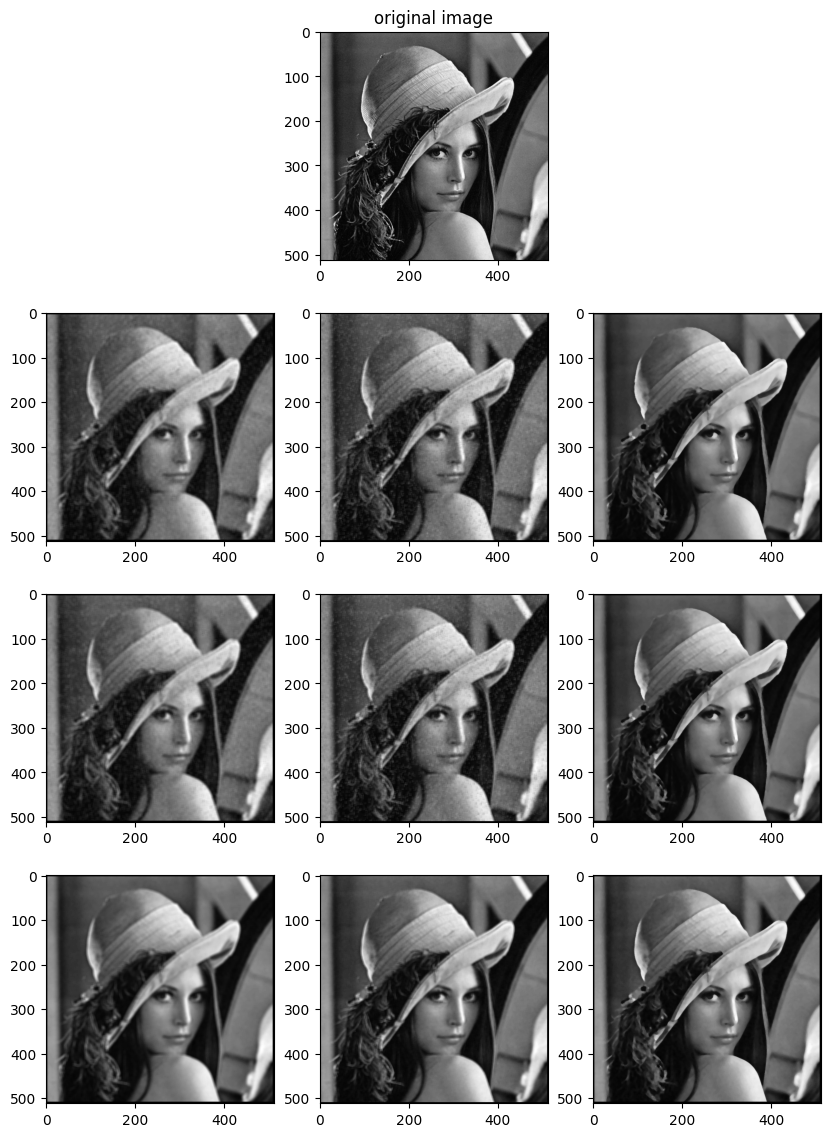

In [50]:
img = cv2.imread('images/01-lena-gray.png', cv2.IMREAD_GRAYSCALE)

filters = (mean_filter, gaussian_filter, median_filter)
create_noises = (create_salt_pepper, create_impulse_noise, create_gaussian_noise)

# Plot
plt.figure(figsize=(10, 14))

plt.subplot(4, 3, 2)
plt.title('original image')
plt.imshow(img, cmap='gray')

for c, create_noise in enumerate(create_noises):
    for f, filter in enumerate(filters):
        plt.subplot(4, 3, 4 + 3 * c + f)
        plt.imshow(filter(create_noise(img)), cmap='gray')

plt.show()